In [1]:
import os
import sys

"""
このnotebookがbaseフォルダを読めるようになるための処理
"""

root_rel = '../../'

# 相対パスを絶対パスに変換してsys.pathに追加
root_abs = os.path.abspath(root_rel)
if root_abs not in sys.path:
    sys.path.append(root_abs)
print(root_abs)

/Users/nagayayoshihiro/project/IXS


In [2]:
# ライブラリの取り込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm import tqdm

import shutil
from scipy.ndimage import rotate
import locale
locale.setlocale(locale.LC_TIME, '')

'ja_JP.UTF-8'

In [3]:
from pyWinSpec.winspec import SpeFile
# dir(SpeFile)

In [4]:
before_folder = "/Volumes/Ohta_ssd/Nagaya/IXS/2210/2022Oct19_T_Hirose/2022Oct19_T_Hirose/Ohta06_180GPa/calib/bef"
after_folder = "/Volumes/Ohta_ssd/Nagaya/IXS/2210/2022Oct19_T_Hirose/2022Oct19_T_Hirose/Ohta06_180GPa/calib/aft"

In [5]:
print("Before folder: ", before_folder)
before_files = os.listdir(before_folder)

for i, file in enumerate(before_files):
    print(f"{i+1}: {file}")

Before folder:  /Volumes/Ohta_ssd/Nagaya/IXS/2210/2022Oct19_T_Hirose/2022Oct19_T_Hirose/Ohta06_180GPa/calib/bef
1: T1_4_calib.SPE
2: T1_5_calib.SPE
3: T1_6_calib.SPE
4: T1_7_calib.SPE
5: T1_8_calib.SPE
6: T1_9_calib.SPE
7: T1_10_calib.SPE
8: T1_11_calib.SPE
9: T1_13_calib.SPE
10: T1_15_calib.SPE
11: T1_16_calib.SPE
12: T1_17_calib.SPE
13: T1_18_calib.SPE
14: T1_20_calib.SPE
15: T1_21_calib.SPE
16: T1_22_calib.SPE
17: T1_23_calib.SPE
18: T1_24_calib.SPE
19: T1_25_calib.SPE
20: T1_26_calib.SPE
21: T1_27_calib.SPE
22: T1_29_calib.SPE
23: T1_30_calib.SPE
24: T1_31_calib.SPE
25: T1_32_calib.SPE
26: T1_34_calib.SPE
27: T1_35_calib.SPE
28: T1_36_calib.SPE
29: T1_37_calib.SPE
30: T1_38_calib.SPE
31: T1_39_calib.SPE
32: T1_41_calib.SPE
33: T1_42_calib.SPE


In [6]:
# ファイルへのアクセス方法
os.path.join(before_folder, before_files[0])

'/Volumes/Ohta_ssd/Nagaya/IXS/2210/2022Oct19_T_Hirose/2022Oct19_T_Hirose/Ohta06_180GPa/calib/bef/T1_4_calib.SPE'

In [7]:
before_spe_list = []

for files in before_files:
    spe_path = os.path.join(before_folder, files)
    before_spe_list.append(SpeFile(name=spe_path))
    
before_spe_list

[SPE File 
 	1340x400 area, 1 frames
 	Taken on 19Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 19Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 19Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct2022,
 SPE File 
 	1340x400 area, 1 frames
 	Taken on 20Oct202

In [34]:
# 保存先path
# spe = before_spe_list[0]
# os.path.join(after_folder, f"rotated_{str(spe.filenum)}.spe")

In [14]:
copied_spe_list = []

# WARNING このセルを実行すると、オリジナルで再度初期化されます。回転したあとは注意!
def get_file_name(spe_path): # これSpeFileクラスにないっけ？ありそう
    base_filename = os.path.basename(spe_path).replace('_calib.SPE', '')
    return base_filename

for i, files in enumerate(before_files):
    # speはオリジナルから作成されたSpeFileオブジェクト
    base_filename = get_file_name(files)
    print(f"{i+1}: {files}")
    before_path = os.path.join(before_folder, files)
    after_path = os.path.join(after_folder, f"rotated_{base_filename}.spe")
#     os.makedirs(os.path.dirname(after_path), exist_ok=True) # 自動的にフォルダを作るので注意

    shutil.copyfile(src=before_path, dst=after_path)
    copied_spe_list.append(SpeFile(name=after_path)) # SpeFileオブジェクトにしておく

1: T1_4_calib.SPE
2: T1_5_calib.SPE
3: T1_6_calib.SPE
4: T1_7_calib.SPE
5: T1_8_calib.SPE
6: T1_9_calib.SPE
7: T1_10_calib.SPE
8: T1_11_calib.SPE
9: T1_13_calib.SPE
10: T1_15_calib.SPE
11: T1_16_calib.SPE
12: T1_17_calib.SPE
13: T1_18_calib.SPE
14: T1_20_calib.SPE
15: T1_21_calib.SPE
16: T1_22_calib.SPE
17: T1_23_calib.SPE
18: T1_24_calib.SPE
19: T1_25_calib.SPE
20: T1_26_calib.SPE
21: T1_27_calib.SPE
22: T1_29_calib.SPE
23: T1_30_calib.SPE
24: T1_31_calib.SPE
25: T1_32_calib.SPE
26: T1_34_calib.SPE
27: T1_35_calib.SPE
28: T1_36_calib.SPE
29: T1_37_calib.SPE
30: T1_38_calib.SPE
31: T1_39_calib.SPE
32: T1_41_calib.SPE
33: T1_42_calib.SPE


In [22]:
rotate_deg = 0.024

In [23]:
# 関数定義
def rotate_spe(before_spe: SpeFile,
               copied_spe: SpeFile,
               rotate_deg: float):
    spe_file_id = open(copied_spe.filename, "r+b")
    # FIXME これは岡崎がSpeFileに実装してくれたのであとで消す。
    data_type_dict = {
        0: np.float32,
        1: np.int32,
        2: np.int16,
        3: np.uint16,
        8: np.uint32,
        5: np.float64
    }
    img_type = data_type_dict[before_spe._data_type]
    
    xdim = np.int64(_read_at(spe_file_id, pos=42, size=1, ntype=np.int16))[0]
    ydim = np.int64(_read_at(spe_file_id, pos=656, size=1, ntype=np.int16))[0]
    img_size = xdim * ydim
    num_frames = _read_at(spe_file_id, pos=1446, size=1, ntype=np.int32)[0]
    
    # saturation_flag = False # これも保存した方が良いんだろうなと思うが、重要性は低い
    
    # 書き換える位置にシークし、imgデータを書き込む
    pos = 4100 # 1個目の位置
    for i in tqdm(range(num_frames)):
        spe_file_id.seek(pos)
#         if before_spe.img[i].max() < 65_000: # サチってなければ回転。閾値が65535でないのはそういう時があるから。この数字はなんとなく
#             new_img = rotate(before_spe.img[i], rotate_deg, reshape=False) # 回転
#             new_img = new_img.reshape(img_size, 1) # 2次元データを1次元に
#             new_img = new_img.astype(dtype=img_type)
#         else: # サチってれば0にする
#             # saturation_flag = True # これも保存した方が良いんだろうなと思うが、重要性は低い
#             new_img = np.zeros(before_spe.img[i].shape, dtype=img_type)
#         spe_file_id.write(new_img.tobytes()) # バイナリ書き込み
#         pos = spe_file_id.tell() # 書き込み終了したところのposに更新する

        if before_spe.img.max() < 70_000: # サチってなければ回転。閾値が65535でないのはそういう時があるから。この数字はなんとなく
            new_img = rotate(before_spe.img, rotate_deg, reshape=False) # 回転
            new_img = new_img.reshape(img_size, 1) # 2次元データを1次元に
            new_img = new_img.astype(dtype=img_type)
        else: # サチってれば0にする
            # saturation_flag = True # これも保存した方が良いんだろうなと思うが、重要性は低い
            new_img = np.zeros(before_spe.img.shape, dtype=img_type)
        spe_file_id.write(new_img.tobytes()) # バイナリ書き込み
        pos = spe_file_id.tell() # 書き込み終了したところのposに更新する
    
    spe_file_id.close()

def _read_at(file_id, pos, size, ntype):
    pos = int(pos)
    size = int(size)
    file_id.seek(pos)
    return np.fromfile(file_id, ntype, size)


In [24]:
# # 確認
# # ここで確認してることはコピーした時に確認するべきことではある気がする



# # 数が等しいことを確認
# assert len(before_spe_list) == len(copied_spe_list)

# # それぞれのファイル名が等しいことを確認
# for i in range(len(before_spe_list)):
#     assert get_file_name(before_spe_list[i]) == get_file_name(copied_spe_list[i])

# print("OK")

In [25]:
spe.img.shape

NameError: name 'spe' is not defined

In [26]:
# 回転させる
for i in range(len(copied_spe_list)):
    rotate_spe(before_spe_list[i], copied_spe_list[i], rotate_deg)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.34it/s]


In [27]:
# ここでコピーしたspeファイルをもう一度インスタンス化して確認する
after_spe_list = []

for files in copied_spe_list: # コピーした時に作ったインスタンスを参照
    after_spe_list.append(SpeFile(name=files.filename))

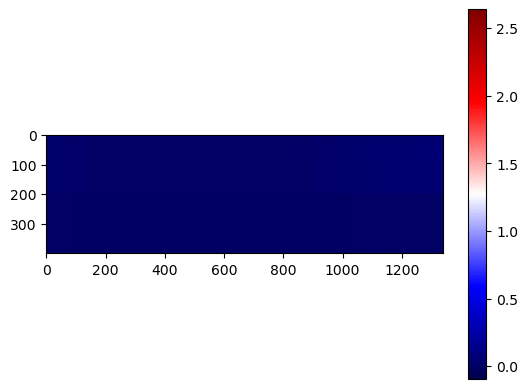

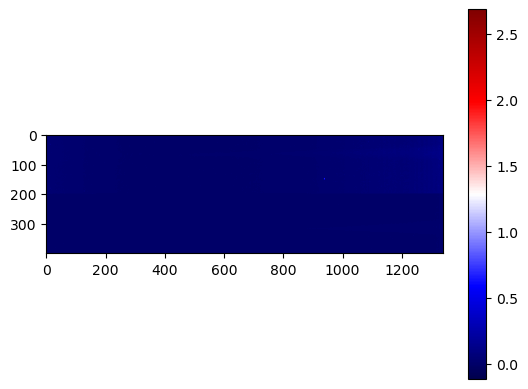

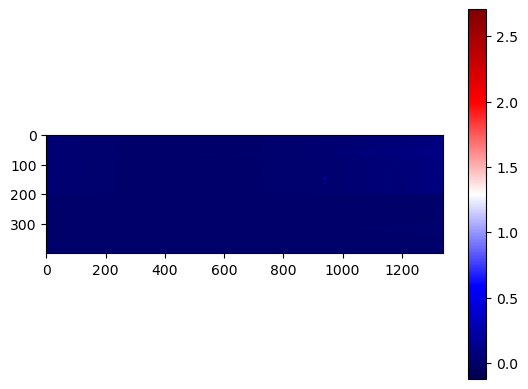

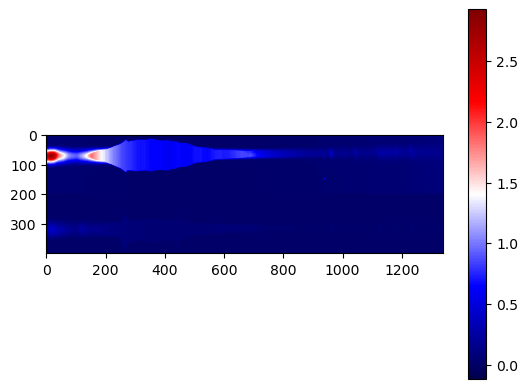

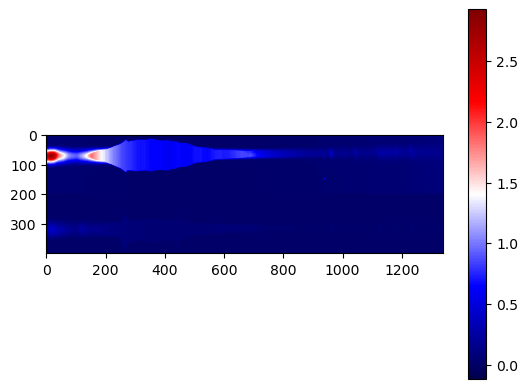

In [28]:
# imshowして確認
"""
・適切に回転 -> ロンギヌスの槍みたいになる
・サチ      -> 片方サチって回転後は0埋めしているので確認できない。frame変える
・0        -> 温度が低すぎて測温できてない。frame変える
"""
frame = -50 # 最後から50 frame

# for i in range(len(before_spe_list)):
#     fig  = plt.figure()
#     plt.imshow(before_spe_list[i].img[frame] - after_spe_list[i].img[frame])
#     plt.colorbar()
#     plt.suptitle(get_file_name(before_spe_list[i]))
    
# for i in range(len(before_spe_list)):
for i in range(5):
    fig  = plt.figure()
#     plt.imshow(before_spe_list[i].img - after_spe_list[i].img, cmap='seismic')
    plt.imshow(after_spe_list[i].img, cmap='seismic')
    plt.colorbar()
#     plt.suptitle(get_file_name(before_spe_list[i]))